# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>
<a href="https://www.hackerrank.com/kggold4?hr_r=1"><img src="images/hackerrank.png" width="25px" height="25px" align="left"></a>
<a href="https://stackoverflow.com/users/14749277/kfir-goldfarb"><img src="images/stackoverflow.png" width="25px" height="25px" align="left"></a>

<br>

# Jupyter Notebook Number 1
<i>Improving My <a href="https://github.com/kggold4/final-project-intro-data-science/blob/main/notebook3.ipynb">Introduction to Data Science Course Final Project Classification Problem</a> using ensemble and usupervised learning</i>

# First let's start this task like the original task

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ensemble learning models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/spscientist/students-performance-in-exams

### this dataset deals with different grades of students according to 3 topics:

1. math score
2. reading score
3. writing score

### this information we have about a student is:

1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

# The goal of my machine learning model:

After the data preparation, I want to take for each student the three scores: math score, reading score and writing score and merge them to one feature by the mean of the three, this feature will called average.
After that process we have one feature called average and have a number value between 0 and 100, i want to classified the scores to two main classes:

1. 1, if x >= 60 ('pass')
2. 0, else ('fail')

Now, the goal of the model by a given a data of a student is to predict what is the status of the student, if the studet is fail ('0') or pass ('1') in the tests score.

In [2]:
# import data:
students = pd.read_csv('data/task_1/students.csv')

In [3]:
# first five students:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# seeing the students scores widely
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## <i>Dataset Features:</i>
1. gender - the sex of the student (male or female)
2. race/ethnicity - the race/ethnicity of the student (groups) - (details on the groups below)
3. parental level of education - the parental level of education of the student (the parents of his) - (details on the groups below)
4. lunch - if the student ate a lunch before the exams
5. test preparation course - if the student take a test preparation course
6. math score
7. reading score
8. writing score

In [5]:
# checking if the data contains null data objects:
# and see data types
students.info()

# as we can see the data is clean of null data objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# another check for finding null objects
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## <i>Preparing the data:</i>

In [7]:
# adding the average score feature for each student with the average of math, reading and writing score
# the assign ,method is to change every average value in average target for each row
students = students.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score']) / 3.0))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


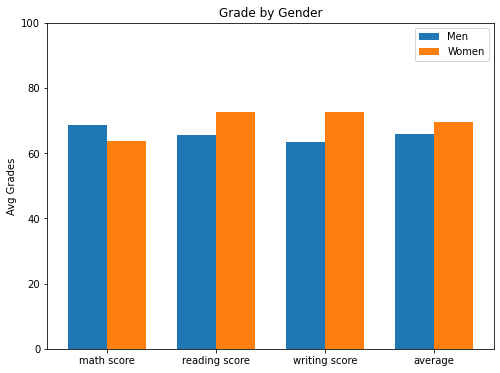

In [8]:
# ploting a bar plot with grades by genders (means):

# male will get a numpy array with the means of scores by male gender
male = np.array(students.groupby('gender').mean())[1]

# male will get a numpy array with the means of scores by female gender
female = np.array(students.groupby('gender').mean())[0]

# change the figure size of the bar plot
plt.figure(figsize=(8,6))

width = 0.36
ind = np.arange(4)

# ploting man scores means
plt.bar(ind, male, width, label='Men')

# ploting women scores means
plt.bar(ind + width, female, width, label='Women')

# limit the axis from 0 to 100
plt.ylim(0,100)

# y label
plt.ylabel('Avg Grades')

# plot title
plt.title('Grade by Gender')

# x ticks
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))

plt.legend()

plt.show()

In [9]:
# for preparing all the binary values of text (string objects) in the data set:
# I used the LabelEncoder from sklearn.preprocessing library,
# that helping me to convert all the binary values of texetual data to a numbers

lc = LabelEncoder()

# preparing the 'gender' feature to binary numbers (0 = female, 1 = male)
students['gender'] = lc.fit_transform(students['gender'])

# preparing the 'lunch' feature to binary numbers (0 = free/reduced	, 1 = standard)
students['lunch'] = lc.fit_transform(students['lunch'])

# preparing the 'lunch' feature to binary numbers (0 = completed, 1 = none)
students['test preparation course'] = lc.fit_transform(students['test preparation course'])

# showing results
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,1,1,72,72,74,72.666667
1,0,group C,some college,1,0,69,90,88,82.333333
2,0,group B,master's degree,1,1,90,95,93,92.666667
3,1,group A,associate's degree,0,1,47,57,44,49.333333
4,1,group C,some college,1,1,76,78,75,76.333333


In [10]:
# define a function that plot with a pie
def print_pie(values, lables):
    values = list(values)
    
    # get a objcet pie from matplotlib and a figure
    fig1, ax1 = plt.subplots()

    # set the size of the figure
    fig1.set_figheight(7)
    fig1.set_figwidth(7)

    # plot the pie
    # x - the parental level of education data
    # autopct - show the percentages at only one decimal point
    # shadow - show the shadow of the pie
    # startangle - rotate the pie in 90 degrees
    ax1.pie(values, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)

    # equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')

    plt.show()

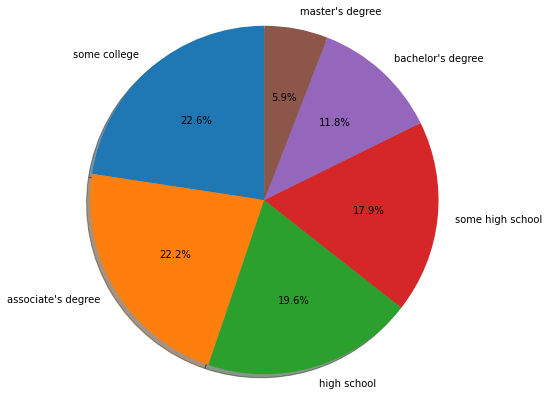

In [11]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = students['parental level of education'].value_counts()

# write all the type of values in parental level of education feature
parents_education = ['some college', 'associate\'s degree', 'high school',
                     'some high school', 'bachelor\'s degree', 'master\'s degree']

print_pie(values, parents_education)

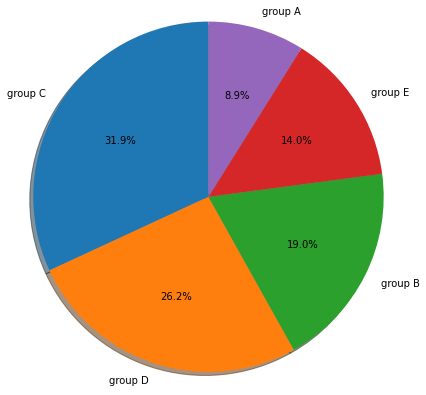

In [12]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = list(students['race/ethnicity'].value_counts())

# write all the type of values in parental level of education feature
ethnicity = ['group C', 'group D', 'group B', 'group E', 'group A']

print_pie(values, ethnicity)

In [13]:
# create dummies varables for 'race/ethnicity' feature:
students = pd.get_dummies(students, columns=['race/ethnicity'])

# create dummies varables for 'parental level of education' feature:
students = pd.get_dummies(students, columns=['parental level of education'])

# droping the math score, reading score and writing score features
students.drop('math score', inplace=True, axis = 1)
students.drop('reading score', inplace=True, axis = 1)
students.drop('writing score', inplace=True, axis = 1)

# classified the average score feature as: if x >= 60 - 1 ('pass'), else - 0 ('fail')
students['average'] = students['average'].apply(lambda x: 1 if x >= 60 else 0)
students.head(10)

,gender,lunch,test preparation course,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0
5,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


### Separate data to training and testing sets

In [14]:
feature_cols = ['gender','lunch','test preparation course','race/ethnicity_group A','race/ethnicity_group B',
                'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E',
                'parental level of education_associate\'s degree', 'parental level of education_bachelor\'s degree',
                'parental level of education_high school', 'parental level of education_master\'s degree',
                'parental level of education_some college', 'parental level of education_some high school']
X = students[feature_cols]
y = students['average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#### Print Accuracy function:

In [15]:
# function that print the accuracy of a classification model
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)
    probabilities = clf.predict_proba(X_test)
    probabilities = probabilities[:, 1]

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print(classification_report(y_test, pridictions))
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))
    return accuracy

#### Plot Confusion Matrix function:

In [16]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

### Dummy Classifier (Model 0)

In [17]:
pass_result = 0
fail_result = 0
for i in y_test:
    if i == 1:
        pass_result += 1
    else:
        fail_result += 1
        
print("pass result are:", pass_result)
print("fail result are:", fail_result)

pass result are: 180
fail result are: 70


### Assuming that our dummy classifier will always perdict the same result - 1 (pass).
### So as can we see our test train contains 250 samples that 180 of them are pass and 70 of them are fail,
#### And that so our dummy classifier will correct at predictions in 180/250 = 0.72 % accuracy (depends on the test data)

### Using KNeighborsClassifier model
#### Accuracy:

In [18]:
# get the classifier (found that 5 neighbors is the best predicter)
nclf = KNeighborsClassifier(n_neighbors=5)

# print accuracy
print_accuracy(nclf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.47      0.40      0.43        70
           1       0.78      0.82      0.80       180

    accuracy                           0.70       250
   macro avg       0.62      0.61      0.62       250
weighted avg       0.69      0.70      0.70       250

accuracy of the model is: 70.40 %


0.704

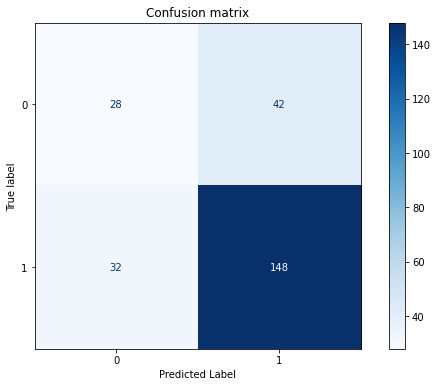

In [19]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(nclf, X_test, y_test)

### Using DecisionTreeClassifier model
#### Accuracy:

In [20]:
# get the classifier 
dclf = DecisionTreeClassifier()

# print accuracy
print_accuracy(dclf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        70
           1       0.80      0.82      0.81       180

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.72      0.72       250

accuracy of the model is: 72.40 %


0.724

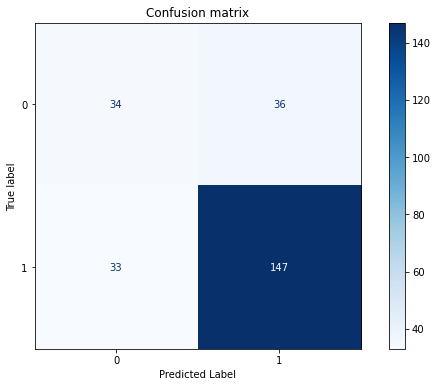

In [21]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(dclf, X_test, y_test)

### Using LogisticRegression classifier model
#### Accuracy:

In [22]:
# get the classifier 
lclf = LogisticRegression()

# print accuracy
print_accuracy(lclf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.34      0.46        70
           1       0.79      0.94      0.86       180

    accuracy                           0.78       250
   macro avg       0.75      0.64      0.66       250
weighted avg       0.76      0.78      0.75       250

accuracy of the model is: 77.60 %


0.776

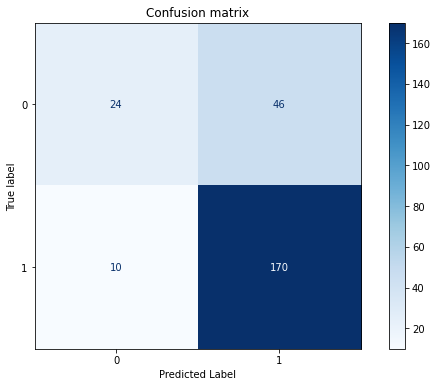

In [23]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(lclf, X_test, y_test)

### Up to this point, I have briefly shown what I did in the final project of  introduction to data science course in the classification problem in the third notebook using three models:

1. KNeighborsClassifier   ~ 70.40 % accuracy
2. DecisionTreeClassifier ~ 71.60 % accuracy
3. LogisticRegression     ~ 77.60 % accuracy

## We will now use ensemble learning to see if we can get a machine learning model with better accuracy

# <i>Ensemble learning</i>
### Using Hard VotingClassifier:

In [24]:
hard_voting_clf = VotingClassifier(
    estimators=[('nlf', nclf), ('dlf', dclf), ('llf', lclf)],
    voting='hard')
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nlf', KNeighborsClassifier()),
                             ('dlf', DecisionTreeClassifier()),
                             ('llf', LogisticRegression())])

In [25]:
for clf in (nclf, dclf, lclf, hard_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "{:.2f}".format(accuracy_score(y_test, y_pred) * 100), "%")

KNeighborsClassifier 70.40 %
DecisionTreeClassifier 72.40 %
LogisticRegression 77.60 %
VotingClassifier 74.80 %


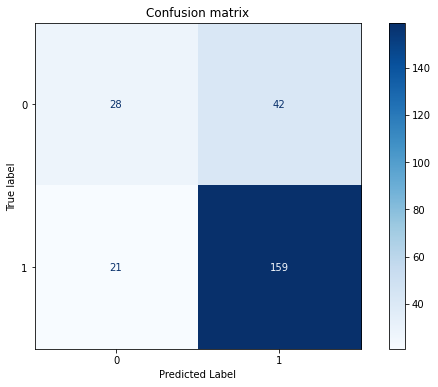

In [26]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(hard_voting_clf, X_test, y_test)

### Using Soft VotingClassifier:

In [27]:
soft_voting_clf = VotingClassifier(
    estimators=[('nlf', nclf), ('dlf', dclf), ('llf', lclf)],
    voting='soft')
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nlf', KNeighborsClassifier()),
                             ('dlf', DecisionTreeClassifier()),
                             ('llf', LogisticRegression())],
                 voting='soft')

In [28]:
for clf in (nclf, dclf, lclf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "{:.2f}".format(accuracy_score(y_test, y_pred) * 100), "%")

KNeighborsClassifier 70.40 %
DecisionTreeClassifier 71.60 %
LogisticRegression 77.60 %
VotingClassifier 76.80 %


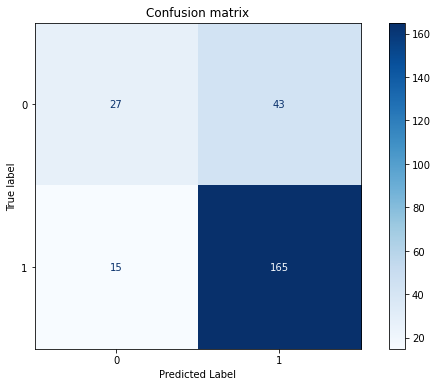

In [29]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(soft_voting_clf, X_test, y_test)

### As we can see the hard and soft voting classifiers didn't give us better accuracy than logistic regression, but the soft voting classifier gives better accuracy (76.80%) then the hard voring classifier accuracy (74.80 %)
<br>

# <i>Bagging and Pasting</i>

* Use the same training algorithm for every preditor and train them on different random subsets of training set.
    * ```Bagging``` is when sampling is perfomed with replacement.
    * ```Pasting``` is when sampling is prefomed without repalcement.
    
* Parameters:
    * Classifier to use
    * ```n_estimators``` number of ensembles
    * ```max_samples``` number of samples
    * ```bootstrap``` True for bagging and False for pasting
    * ```n_jobs``` the number of cpu's to use in the computer (when the parameter is equal to -1 the model will use all the available cpu's)

###  Bagging (enstimators=500 and max_samples=100)

In [30]:
a_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(a_bag_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.62      0.37      0.46        70
           1       0.79      0.91      0.85       180

    accuracy                           0.76       250
   macro avg       0.70      0.64      0.65       250
weighted avg       0.74      0.76      0.74       250

accuracy of the model is: 76.00 %


0.76

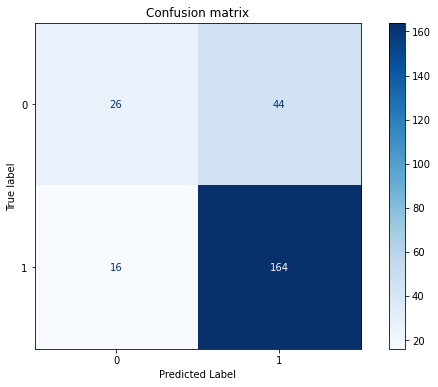

In [31]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(a_bag_clf, X_test, y_test)

###  Bagging (enstimators=100 and max_samples=50)

In [32]:
b_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=50, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(b_bag_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.34      0.46        70
           1       0.79      0.94      0.86       180

    accuracy                           0.78       250
   macro avg       0.75      0.64      0.66       250
weighted avg       0.76      0.78      0.75       250

accuracy of the model is: 77.60 %


0.776

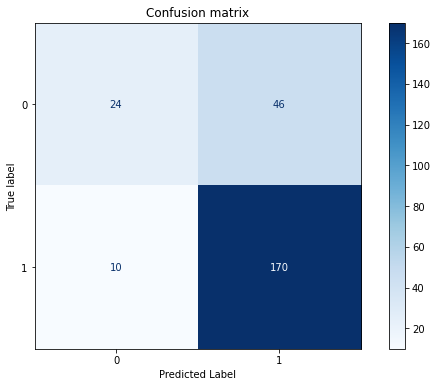

In [33]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(b_bag_clf, X_test, y_test)

###  Pasting (enstimators=500 and max_samples=100)

In [34]:
c_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(c_bag_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.67      0.37      0.48        70
           1       0.79      0.93      0.85       180

    accuracy                           0.77       250
   macro avg       0.73      0.65      0.67       250
weighted avg       0.76      0.77      0.75       250

accuracy of the model is: 77.20 %


0.772

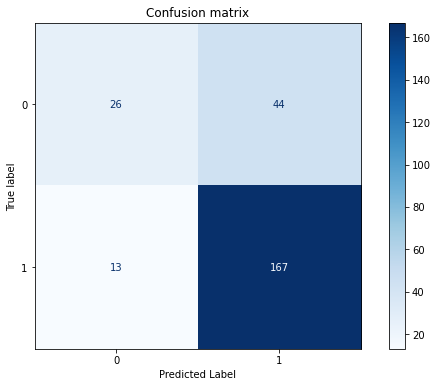

In [35]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(c_bag_clf, X_test, y_test)

###  Pasting (enstimators=100 and max_samples=50)

In [36]:
d_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=50, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(d_bag_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.63      0.31      0.42        70
           1       0.78      0.93      0.85       180

    accuracy                           0.76       250
   macro avg       0.70      0.62      0.63       250
weighted avg       0.74      0.76      0.73       250

accuracy of the model is: 75.60 %


0.756

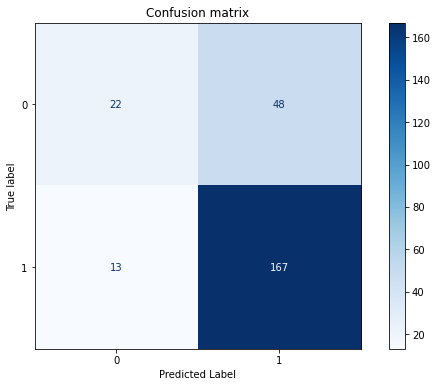

In [37]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(d_bag_clf, X_test, y_test)

### Bagging using random splintering (estimators=500 and max_samples=1.0)

In [38]:
e_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(e_bag_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.33      0.44        70
           1       0.78      0.94      0.85       180

    accuracy                           0.77       250
   macro avg       0.73      0.63      0.65       250
weighted avg       0.75      0.77      0.74       250

accuracy of the model is: 76.80 %


0.768

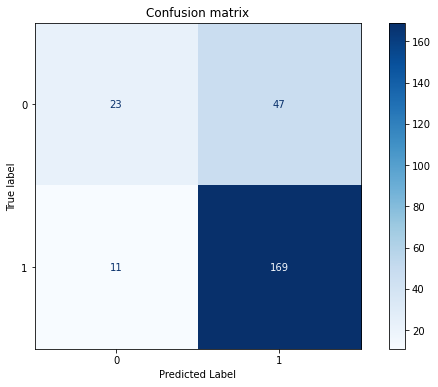

In [39]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(e_bag_clf, X_test, y_test)

### As we can see there is no dramatic change between the accuracy of bagging and pasting classifiers (even if we changing the number of estimators and max samples [500 and 100 or 100 and 50]),
### The accuracy of bagging and pasting classifiers is about ~76 %

# <i>Random Forests</i>

* Random forests classifier is an ensemble of decision trees (generally trained via the bagging method)
    * ```n_estimators``` is the number if trees
    * ```max_leaf_nodes``` is the max size of each tree
    * ```n_jobs``` is the number of cpu's to use in the computer (when the parameter is equal to -1 the model will use all the available cpu's)

In [40]:
rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.11      0.20        70
           1       0.74      0.99      0.85       180

    accuracy                           0.74       250
   macro avg       0.77      0.55      0.52       250
weighted avg       0.76      0.74      0.67       250

accuracy of the model is: 74.40 %


0.744

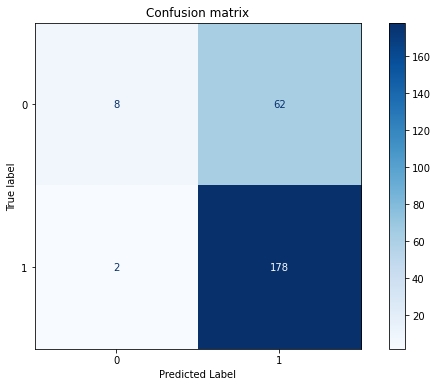

In [41]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_test, y_test)

# <i>Boosting</i>

### Using AdaBoost:
* Parameters:
    * classifier to use
    * ```n_estimators``` number of ensembles.
    * ```algorithm``` version of AdaBoost.
    * ```learning_rate``` minimize the cost of the function, gradually the lower is making it better.

In [42]:
a_ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.1)

# print accuracy
print_accuracy(a_ada_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.72      0.33      0.45        70
           1       0.78      0.95      0.86       180

    accuracy                           0.78       250
   macro avg       0.75      0.64      0.66       250
weighted avg       0.77      0.78      0.74       250

accuracy of the model is: 77.60 %


0.776

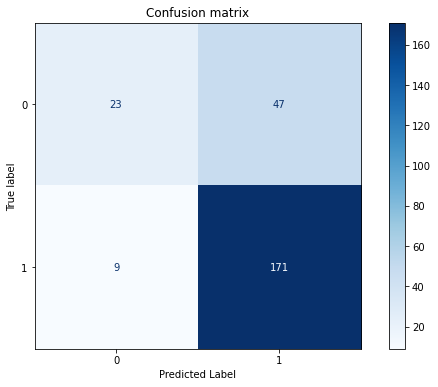

In [43]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(a_ada_clf, X_test, y_test)

### Trying the same with logistic regression but get the same accuracy:

In [44]:
b_ada_clf = AdaBoostClassifier(
    LogisticRegression(),
    n_estimators=200,
    learning_rate=0.1)

# print accuracy
print_accuracy(b_ada_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.10      0.18        70
           1       0.74      0.99      0.85       180

    accuracy                           0.74       250
   macro avg       0.76      0.54      0.51       250
weighted avg       0.75      0.74      0.66       250

accuracy of the model is: 74.00 %


0.74

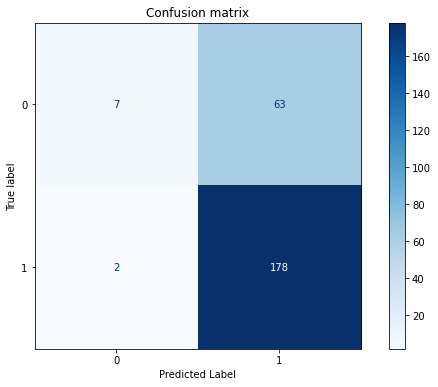

In [45]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(b_ada_clf, X_test, y_test)

### Using Gradient Boosting:

In [46]:
gbrt_clf = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=200,
    learning_rate=0.1)

# print accuracy
print_accuracy(gbrt_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.74      0.37      0.50        70
           1       0.80      0.95      0.87       180

    accuracy                           0.79       250
   macro avg       0.77      0.66      0.68       250
weighted avg       0.78      0.79      0.76       250

accuracy of the model is: 78.80 %


0.788

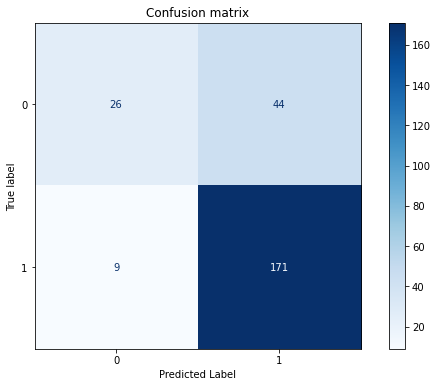

In [47]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(gbrt_clf, X_test, y_test)

### Using Extreme Gradient Boosting:

In [48]:
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
print_accuracy(xgb_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.62      0.40      0.49        70
           1       0.80      0.91      0.85       180

    accuracy                           0.76       250
   macro avg       0.71      0.65      0.67       250
weighted avg       0.75      0.76      0.75       250

accuracy of the model is: 76.40 %


0.764

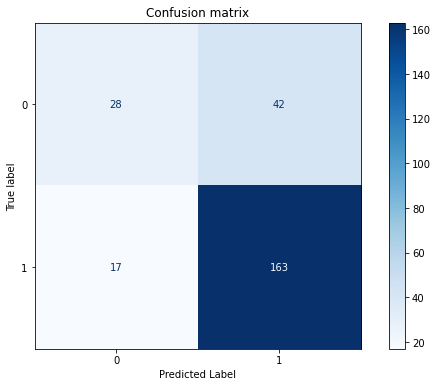

In [49]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(xgb_model, X_test, y_test)

## ROC curve:
### **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

### **Prediction probabilities**

In [50]:
# Random (chance) Prediction in the ROC plot (the middle straight line)
r_probs = [0 for _ in range(len(y_test))]

# calculate probabilities for each classifier
nclf_probs = nclf.predict_proba(X_test)
dclf_probs = dclf.predict_proba(X_test)
lclf_probs = lclf.predict_proba(X_test)

# hard_voting_clf_probs = hard_voting_clf.predict_proba(X_test)
# Raise an Error: AttributeError: predict_proba is not available when voting='hard'

soft_voting_clf_probs = soft_voting_clf.predict_proba(X_test)
a_bag_clf_probs = a_bag_clf.predict_proba(X_test)
b_bag_clf_probs = b_bag_clf.predict_proba(X_test)
c_bag_clf_probs = c_bag_clf.predict_proba(X_test)
d_bag_clf_probs = d_bag_clf.predict_proba(X_test)
e_bag_clf_probs = e_bag_clf.predict_proba(X_test)
rnd_clf_probs = rnd_clf.predict_proba(X_test)
a_ada_clf_probs = a_ada_clf.predict_proba(X_test)
b_ada_clf_probs = b_ada_clf.predict_proba(X_test)
gbrt_clf_probs = gbrt_clf.predict_proba(X_test)
xgb_model_probs = xgb_model.predict_proba(X_test)

# for each probabilities for a classifier data change from nested list to one list
nclf_probs = nclf_probs[:, 1]
dclf_probs = dclf_probs[:, 1]
lclf_probs = lclf_probs[:, 1]
soft_voting_clf_probs = soft_voting_clf_probs[:, 1]
a_bag_clf_probs = a_bag_clf_probs[:, 1]
b_bag_clf_probs = b_bag_clf_probs[:, 1]
c_bag_clf_probs = c_bag_clf_probs[:, 1]
d_bag_clf_probs = d_bag_clf_probs[:, 1]
e_bag_clf_probs = e_bag_clf_probs[:, 1]
rnd_clf_probs = rnd_clf_probs[:, 1]
a_ada_clf_probs = a_ada_clf_probs[:, 1]
b_ada_clf_probs = b_ada_clf_probs[:, 1]
gbrt_clf_probs = gbrt_clf_probs[:, 1]
xgb_model_probs = xgb_model_probs[:, 1]

# ROC is the receiver operating characteristic AUROC is the area under the ROC curve
# get accuracy for each classifier from the test data and the probabilities data
r_auc = roc_auc_score(y_test, r_probs)
nclf_auc = roc_auc_score(y_test, nclf_probs)
dclf_auc = roc_auc_score(y_test, dclf_probs)
lclf_auc = roc_auc_score(y_test, lclf_probs)
soft_voting_clf_auc = roc_auc_score(y_test, soft_voting_clf_probs)
a_bag_clf_auc = roc_auc_score(y_test, a_bag_clf_probs)
b_bag_clf_auc = roc_auc_score(y_test, b_bag_clf_probs)
c_bag_clf_auc = roc_auc_score(y_test, c_bag_clf_probs)
d_bag_clf_auc = roc_auc_score(y_test, d_bag_clf_probs)
e_bag_clf_auc = roc_auc_score(y_test, e_bag_clf_probs)
rnd_clf_auc = roc_auc_score(y_test, rnd_clf_probs)
a_ada_clf_auc = roc_auc_score(y_test, a_ada_clf_probs)
b_ada_clf_auc = roc_auc_score(y_test, b_ada_clf_probs)
gbrt_clf_auc = roc_auc_score(y_test, gbrt_clf_probs)
xgb_model_auc = roc_auc_score(y_test, xgb_model_probs)

classifiers_auc = {
    'Random (chance) Prediction' : (r_auc),
    'K-Neighbors Classifier' : (nclf_auc),
    'Decision Tree Classifier' : (dclf_auc),
    'Logistic Regression Classifier' : (lclf_auc),
    'Soft Voting Classifier' : (soft_voting_clf_auc),
    'Bagging Classifier 1' : (a_bag_clf_auc),
    'Bagging Classifier 2' : (b_bag_clf_auc),
    'Bagging Classifier 3' : (c_bag_clf_auc),
    'Bagging Classifier 4' : (d_bag_clf_auc),
    'Bagging Classifier 5' : (e_bag_clf_auc),
    'Random Forest Classifier' : (rnd_clf_auc),
    'AdaBoost Classifier 1' : (a_ada_clf_auc),
    'AdaBoost Classifier 2' : (b_ada_clf_auc),
    'Gradient Boosting Classifier' : (gbrt_clf_auc),
    'Extreme Gradient Boosting Classifier' : (xgb_model_auc)
}

# print to see the AUROC for each classifier
for key, value in classifiers_auc.items():
    print((key + ": AUROC = %.3f") % value)

Random (chance) Prediction: AUROC = 0.500
K-Neighbors Classifier: AUROC = 0.644
Decision Tree Classifier: AUROC = 0.691
Logistic Regression Classifier: AUROC = 0.775
Soft Voting Classifier: AUROC = 0.714
Bagging Classifier 1: AUROC = 0.743
Bagging Classifier 2: AUROC = 0.757
Bagging Classifier 3: AUROC = 0.741
Bagging Classifier 4: AUROC = 0.753
Bagging Classifier 5: AUROC = 0.770
Random Forest Classifier: AUROC = 0.766
AdaBoost Classifier 1: AUROC = 0.778
AdaBoost Classifier 2: AUROC = 0.779
Gradient Boosting Classifier: AUROC = 0.754
Extreme Gradient Boosting Classifier: AUROC = 0.715


In [51]:
# Calculate ROC curve
# tpr = TP/(TP+FN) (Sensitivity)
# fpr = FP/(TN+FP) (1 - Specificity)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nclf_fpr, nclf_tpr, _ = roc_curve(y_test, nclf_probs)
dclf_fpr, dclf_tpr, _ = roc_curve(y_test, dclf_probs)
lclf_fpr, lclf_tpr, _ = roc_curve(y_test, lclf_probs)
soft_voting_clf_tpr, soft_voting_clf_fpr, _ = roc_curve(y_test, soft_voting_clf_probs)
a_bag_clf_fpr, a_bag_clf_tpr, _ = roc_curve(y_test, a_bag_clf_probs)
b_bag_clf_fpr, b_bag_clf_tpr, _ = roc_curve(y_test, b_bag_clf_probs)
c_bag_clf_fpr, c_bag_clf_tpr, _ = roc_curve(y_test, c_bag_clf_probs)
d_bag_clf_fpr, d_bag_clf_tpr, _ = roc_curve(y_test, d_bag_clf_probs)
e_bag_clf_fpr, e_bag_clf_tpr, _ = roc_curve(y_test, e_bag_clf_probs)
rnd_clf_fpr, rnd_clf_tpr, _ = roc_curve(y_test, rnd_clf_probs)
a_ada_clf_fpr, a_ada_clf_tpr, _ = roc_curve(y_test, a_ada_clf_probs)
b_ada_clf_fpr, b_ada_clf_tpr, _ = roc_curve(y_test, b_ada_clf_probs)
gbrt_clf_fpr, gbrt_clf_tpr, _ = roc_curve(y_test, gbrt_clf_probs)
xgb_model_fpr, xgb_model_tpr, _ = roc_curve(y_test, xgb_model_probs)

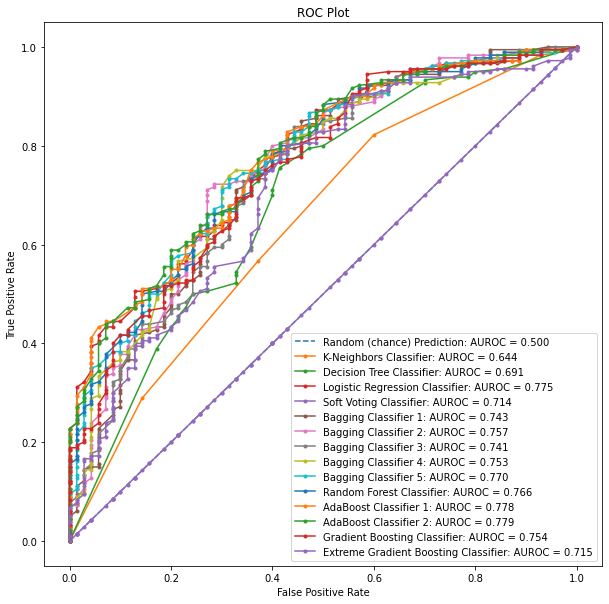

In [52]:
# set the size of the figure
plt.figure(figsize=(10, 10))

# for each classifier plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random (chance) Prediction: AUROC = %.3f' % (r_auc))
plt.plot(nclf_fpr, nclf_tpr, marker='.', label='K-Neighbors Classifier: AUROC = %.3f' % (nclf_auc))
plt.plot(dclf_fpr, dclf_tpr, marker='.', label='Decision Tree Classifier: AUROC = %.3f' % (dclf_auc))
plt.plot(lclf_fpr, lclf_tpr, marker='.', label='Logistic Regression Classifier: AUROC = %.3f' % (lclf_auc))
plt.plot(soft_voting_clf_tpr, soft_voting_clf_tpr, marker='.', label='Soft Voting Classifier: AUROC = %.3f' % (soft_voting_clf_auc))
plt.plot(a_bag_clf_fpr, a_bag_clf_tpr, marker='.', label='Bagging Classifier 1: AUROC = %.3f' % (a_bag_clf_auc))
plt.plot(b_bag_clf_fpr, b_bag_clf_tpr, marker='.', label='Bagging Classifier 2: AUROC = %.3f' % (b_bag_clf_auc))
plt.plot(c_bag_clf_fpr, c_bag_clf_tpr, marker='.', label='Bagging Classifier 3: AUROC = %.3f' % (c_bag_clf_auc))
plt.plot(d_bag_clf_fpr, d_bag_clf_tpr, marker='.', label='Bagging Classifier 4: AUROC = %.3f' % (d_bag_clf_auc))
plt.plot(e_bag_clf_fpr, e_bag_clf_tpr, marker='.', label='Bagging Classifier 5: AUROC = %.3f' % (e_bag_clf_auc))
plt.plot(rnd_clf_fpr, rnd_clf_tpr, marker='.', label='Random Forest Classifier: AUROC = %.3f' % (rnd_clf_auc))
plt.plot(a_ada_clf_fpr, a_ada_clf_tpr, marker='.', label='AdaBoost Classifier 1: AUROC = %.3f' % (a_ada_clf_auc))
plt.plot(b_ada_clf_fpr, b_ada_clf_tpr, marker='.', label='AdaBoost Classifier 2: AUROC = %.3f' % (b_ada_clf_auc))
plt.plot(gbrt_clf_fpr, gbrt_clf_tpr, marker='.', label='Gradient Boosting Classifier: AUROC = %.3f' % (gbrt_clf_auc))
plt.plot(xgb_model_fpr, xgb_model_tpr, marker='.', label='Extreme Gradient Boosting Classifier: AUROC = %.3f' % (xgb_model_auc))

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

# Show plot
plt.show()

## The model with the best accuracy  from what i tested:

In [53]:
max_accuracy_classifier = max(classifiers_auc, key=classifiers_auc.get)
print("\nThe classifier with the maximum accuracy is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_auc[max_accuracy_classifier])))


The classifier with the maximum accuracy is: AdaBoost Classifier 2, with the accuracy of: 77.92 %


# <i>Conclusions</i>:

### So far I have tried to build an ensemble learning model that will work with higher accuracy than other simple models, you can see that we have not been able to reach a higher accuracy dramatically,
### But as we can see the classifier with the maximum accuracy is AdaBoost Classifier Using LogisticRegression, 200 estimators and 0.5 learning_rate with the accuracy of ~ 78 % !